In [1]:
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
from utility import LoadMZML
import os
import pickle

In [3]:
msconvert_file = '/mnt/cmnfs/data/protMSD/GCF_profile/msconvert_profile.mzML' # path to the data input in mzML format, containing only MS1 level data
maxquant_file = '/mnt/cmnfs/data/protMSD/GCF_profile/combined/txt/evidence.txt' # path to MaxQuant results (evidence.txt) of the same RAW file, used for constructing reference dictionary

In [4]:
dirname = os.path.dirname(msconvert_file)
basename = os.path.basename(msconvert_file)
filename = basename[:-5]+'_ScanByScan'
#filename += '_isospec'+str(isospec)+'_dev'+str(dev)+'_initWithCos'+str(initWithCos)+'_IDwithCos'+str(IDwithCos)
print('Filename:', filename)
if not os.path.exists(os.path.join(dirname, filename)):
    os.makedirs(os.path.join(dirname, filename))
filename_full = os.path.join(dirname, filename)
insilico_file = os.path.join(filename_full, filename +'_insilico.xlsx')
output_file = os.path.join(filename_full, filename + '_output') #filename


Filename: msconvert_profile_ScanByScan


## Data Loading

In [5]:
# Load maxquant result (reference)
Maxquant_result = pd.read_csv(filepath_or_buffer=maxquant_file, sep='\t')
Maxquant_result.columns

Index(['Sequence', 'Length', 'Modifications', 'Modified sequence',
       'Oxidation (M) Probabilities', 'Oxidation (M) Score Diffs',
       'Acetyl (Protein N-term)', 'Oxidation (M)', 'Missed cleavages',
       'Proteins', 'Leading proteins', 'Leading razor protein', 'Type',
       'Raw file', 'Experiment', 'MS/MS m/z', 'Charge', 'm/z', 'Mass',
       'Resolution', 'Uncalibrated - Calibrated m/z [ppm]',
       'Uncalibrated - Calibrated m/z [Da]', 'Mass error [ppm]',
       'Mass error [Da]', 'Uncalibrated mass error [ppm]',
       'Uncalibrated mass error [Da]', 'Max intensity m/z 0', 'Retention time',
       'Retention length', 'Calibrated retention time',
       'Calibrated retention time start', 'Calibrated retention time finish',
       'Retention time calibration', 'Match time difference',
       'Match m/z difference', 'Match q-value', 'Match score',
       'Number of data points', 'Number of scans', 'Number of isotopic peaks',
       'PIF', 'Fraction of total spectrum', 'Base 

In [6]:
# Load MS1 scans from pkl or mzml file
try:
    with open(msconvert_file[:-5]+'.pkl', 'rb') as f:
        MS1Scans = pickle.load(f)
    print('Load pre-stored pickle results')
except:
    print('Pickle result not found, load mzml file.')
    MS1Scans = LoadMZML(msconvert_file)
    MS1Scans.to_pickle(msconvert_file[:-5]+'.pkl')
    

Load pre-stored pickle results


In [7]:
MS1Scans['starttime'].describe()

count    4631.000000
mean       42.408265
std        30.247727
min         0.002775
25%        13.673465
50%        42.075660
75%        69.450008
max        92.998972
Name: starttime, dtype: float64

## Isotope Pattern Calculation

In [8]:
import utility
reload(utility)
from utility import CalcModpeptIsopattern
Maxquant_result['IsoMZ'], Maxquant_result['IsoAbundance'] = zip(*Maxquant_result.apply(lambda row: CalcModpeptIsopattern(modpept=row['Modified sequence'], 
                                                                                                     charge=row['Charge'], ab_thres = 0.01), axis=1))

<module 'utility' from '/mnt/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/utility.py'>

<module 'utility' from '/mnt/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/utility.py'>

Precursor  2 eluted at  3.6751 , corresponding scan index  753 with scan time  3.67510674260457


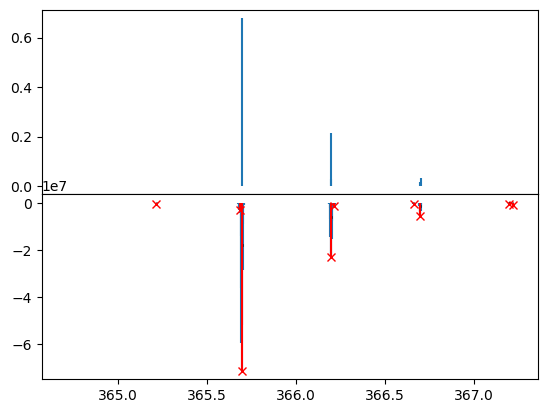

,apex_mzidx,apex_mz,start_mzidx,start_mz,end_mzidx,end_mz,peak_width,peak_height,peak_intensity_sum
0,9,365.215145,7,365.210956,12,365.221429,0.010473,1.244099e+05,1.854039e+06
1,25,365.682677,23,365.678480,26,365.684775,0.006296,2.510833e+06,1.059079e+07
2,31,365.695222,28,365.688926,34,365.701518,0.012592,1.789638e+07,2.710637e+08
3,57,366.197593,54,366.191284,59,366.201799,0.010515,5.805337e+06,9.015504e+07
4,64,366.212090,62,366.207884,66,366.216296,0.008413,7.804082e+05,4.939750e+06
5,79,366.660467,77,366.656253,81,366.664681,0.008428,9.834106e+04,1.377406e+06
6,95,366.698608,92,366.692286,97,366.702823,0.010537,1.359460e+06,2.094527e+07
7,111,367.198340,108,367.192006,114,367.204675,0.012670,1.891864e+05,2.381186e+06
8,120,367.217346,117,367.211011,122,367.221569,0.010559,2.043613e+05,2.812187e+06


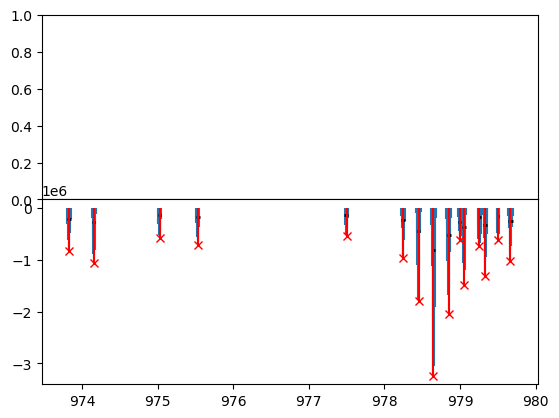

,apex_mzidx,apex_mz,start_mzidx,start_mz,end_mzidx,end_mz,peak_width,peak_height,peak_intensity_sum
0,6,973.821079,4,973.802839,9,973.848439,0.045599,205634.218750,3.199535e+06
1,21,974.158599,18,974.131226,23,974.176848,0.045622,268010.031250,3.802557e+06
2,35,975.026009,32,974.998600,37,975.044283,0.045683,146374.578125,2.082507e+06
3,48,975.528724,46,975.510437,51,975.556156,0.045719,180326.812500,2.572235e+06
4,61,977.497616,58,977.470102,63,977.515959,0.045857,137485.546875,1.988667e+06
5,75,978.250113,72,978.222567,77,978.268477,0.045910,242962.390625,3.310926e+06
6,90,978.453721,87,978.426167,92,978.472092,0.045924,448821.156250,6.764876e+06
7,106,978.645335,104,978.626960,109,978.672899,0.045939,809820.875000,1.237726e+07
8,123,978.848301,120,978.820731,126,978.875874,0.055143,513538.218750,7.725247e+06
9,137,978.994286,135,978.975901,139,979.012671,0.036770,276758.472656,2.065565e+06


In [9]:
import utility
reload(utility)
# to compare the range of isotope pattern belonging to one precursor
utility.PlotIsoPatternAndScan(MS1Scans=MS1Scans, Maxquant_result=Maxquant_result, scan_idx = None, precursor_idx=2, log_intensity=False)
# to see peaks in a specific range
utility.PlotIsoPatternAndScan(scan_idx=3922, precursor_idx=None, mzrange = [970, 980], MS1Scans=MS1Scans, Maxquant_result=Maxquant_result, log_intensity=False)

## ID and Qunat

In [10]:
RT_tol = 0.0
mz_tol = 0.05

### Precursor specific

In [11]:
reload(utility)
alignment = []
scan_idx = 748
# example: generate dictionary for candidate in one scan
OneScan = MS1Scans.iloc[scan_idx, :]
CandidatePrecursorsByRT = Maxquant_result.loc[(Maxquant_result['Calibrated retention time start']-RT_tol <= OneScan['starttime']) & \
        (Maxquant_result['Calibrated retention time finish']+RT_tol>= OneScan['starttime'])]
MS1Intensity = pd.DataFrame({'mzarray_obs':OneScan['mzarray'], 'intensity':OneScan['intarray']})
CandidateDict, CandidatePrecursorsByRT, alignment, IsotopeNotObs, y_true, peak_results = utility.ConstructDict(CandidatePrecursorsByRT, OneScan, method = 'peakRange')

<module 'utility' from '/mnt/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/utility.py'>

In [12]:
CandidatePrecursorsByRT

,Sequence,Length,Modifications,Modified sequence,Oxidation (M) Probabilities,Oxidation (M) Score Diffs,Acetyl (Protein N-term),Oxidation (M),Missed cleavages,Proteins,...,Best MS/MS,AIF MS/MS IDs,Oxidation (M) site IDs,IsoMZ,IsoAbundance,n_matchedIso,AbundanceNotObs,IsKept,mzDelta_mean,mzDelta_std
2,AAADNLR,7,Unmodified,_AAADNLR_,NaN,NaN,0,0,0,WP_000110280.1,...,2,NaN,NaN,"[365.696300789355, 366.194818236955, 366.19797...","[0.6786767743441838, 0.027288424221092972, 0.2...",3,0.048123,True,NaN,NaN
25,AADYGADAASGGHDNK,16,Unmodified,_AADYGADAASGGHDNK_,NaN,NaN,0,0,0,WP_001035936.1,...,31,NaN,NaN,"[507.2189960701033, 507.55134103517, 507.55344...","[0.44543656263958864, 0.03256406729950326, 0.2...",0,0.953392,False,NaN,NaN
26,AADYGADAASGGHDNK,16,Unmodified,_AADYGADAASGGHDNK_,NaN,NaN,0,0,0,WP_001035936.1,...,32,NaN,NaN,"[760.32458158902, 760.8230990366201, 760.82625...","[0.4454881099956096, 0.03256783571842385, 0.29...",0,0.953502,False,NaN,NaN
27,AADYGADAASGGHDNKGPK,19,Unmodified,_AADYGADAASGGHDNKGPK_,NaN,NaN,0,0,1,WP_001035936.1,...,33,NaN,NaN,"[601.27539293255, 601.6077378976166, 601.60984...","[0.37751177395270713, 0.03311803254003856, 0.3...",9,0.000000,True,NaN,NaN
28,AADYGADAASGGHDNKGPK,19,Unmodified,_AADYGADAASGGHDNKGPK_,NaN,NaN,0,0,1,WP_001035936.1,...,34,NaN,NaN,"[451.20850095748, 451.45775968128, 451.4593396...","[0.37746809212738364, 0.033114200457936, 0.304...",9,0.000000,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17611,VIATIDK,7,Unmodified,_VIATIDK_,NaN,NaN,0,0,0,WP_001132220.1,...,24614,NaN,NaN,"[380.23472746054, 380.73324490814, 380.7364048...","[0.6490986092312951, 0.018981190650148277, 0.2...",0,0.966754,False,NaN,NaN
17806,VLAHPVR,7,Unmodified,_VLAHPVR_,NaN,NaN,0,0,0,WP_000894377.1;WP_000660066.1,...,24873,NaN,NaN,"[396.24850353863997, 396.74702098624, 396.7501...","[0.6305565415185921, 0.027658464584687716, 0.2...",0,0.974254,False,NaN,NaN
18215,VQPGVTR,7,Unmodified,_VQPGVTR_,NaN,NaN,0,0,0,WP_000406586.1,...,25466,NaN,NaN,"[378.722318576065, 379.220836023665, 379.22399...","[0.6580928448375671, 0.026460779867038844, 0.2...",0,0.966572,False,NaN,NaN
18351,VTDADDVK,8,Unmodified,_VTDADDVK_,NaN,NaN,0,0,0,WP_000733456.1,...,25661,NaN,NaN,"[431.711813464735, 432.210330912335, 432.21349...","[0.6322340915228402, 0.02079903594470245, 0.24...",1,0.718576,False,NaN,NaN


In [1]:
scan_idx = 748
reload(utility)
n_precursors = Maxquant_result.shape[0]
n_ms1scans = MS1Scans.shape[0]
activation = np.zeros((n_precursors, n_ms1scans))
loss = []
empty_scans = []
ScanProcessRecords = {}
score = []
OneScan = MS1Scans.iloc[scan_idx, :]
CandidatePrecursorsByRT = Maxquant_result.loc[(Maxquant_result['Calibrated retention time start']-RT_tol <= OneScan['starttime']) & \
        (Maxquant_result['Calibrated retention time finish']+RT_tol>= OneScan['starttime'])]
CandidateDict, CandidatePrecursorsByRT, alignment, IsotopeNotObs, y_true, peak_results = utility.ConstructDict(CandidatePrecursorsByRT, OneScan, method = 'peakRange')
filteredPrecursorIdx = np.array(CandidateDict.columns[1:], dtype=int)
for alpha in [0, 0.1, 10]:
    if CandidatePrecursorsByRT.shape[0] > 0:
        CandidateDict, CandidatePrecursorsByRT, alignment, IsotopeNotObs, y_true, peak_results = utility.ConstructDict(CandidatePrecursorsByRT, OneScan, method = 'peakRange')
        filteredPrecursorIdx = np.array(CandidateDict.columns[1:], dtype=int)
        if CandidateDict.shape[1] > 1:
            activationByScan, lossByScan, scoreByScan, pred, explainedInt, explainedPeaks = utility.CalcPrecursorQuant(CandidateDict, y_true, filteredPrecursorIdx=filteredPrecursorIdx, alpha=alpha)
            activation[filteredPrecursorIdx, scan_idx] = activationByScan
            loss.append(lossByScan)
            score.append(scoreByScan)
            utility.PlotTrueAndPredict(x = CandidateDict.index, prediction=pred, true=y_true['intensity'], log = True)
        else:
            lossByScan = None
            print('Scan number, start time ', scan_idx, OneScan['starttime'], 'does not have valid candidate.')
            empty_scans.append((scan_idx, OneScan['starttime']))
        ScanProcessRecords[scan_idx] = {'CandidatePrecursorIdx':CandidatePrecursorsByRT.index,
                                'FilteredCandidatePrecursor':filteredPrecursorIdx,
                                'Residue':lossByScan,
                                'alignment':alignment
                                }
    else:
        print('Scan number, start time ', scan_idx, OneScan['starttime'], 'does not have valid candidate.')



NameError: name 'reload' is not defined

In [17]:
score # cosine distance, the smaller the better

[0.07167473310670458, 0.07167473310671024, 0.07167473316455442]

In [ ]:
activation[2, scan_idx]

In [ ]:
np.nonzero(activation[:, scan_idx])

### Batch

In [56]:
import utility
reload(utility)
from utility import CalcPrecursorQuant
n_precursors = Maxquant_result.shape[0]
n_ms1scans = MS1Scans.shape[0]
activation = np.zeros((n_precursors, n_ms1scans))
loss = []
empty_scans = []
ScanProcessRecords = {}
for scan_idx, OneScan in MS1Scans.iterrows(): # scan by scan activation
    CandidatePrecursorsByRT = Maxquant_result.loc[(Maxquant_result['Calibrated retention time start']-RT_tol <= OneScan['starttime']) & \
        (Maxquant_result['Calibrated retention time finish']+RT_tol>= OneScan['starttime'])]
    if CandidatePrecursorsByRT.shape[0] > 0:
        CandidateDict, CandidatePrecursorsByRT, alignment, IsotopeNotObs, y_true, peak_results = utility.ConstructDict(CandidatePrecursorsByRT, OneScan, method = 'peakRange')
        filteredPrecursorIdx = np.array(CandidateDict.columns[1:], dtype=int)
        if CandidateDict.shape[1] > 1:
            activationByScan, lossByScan, scoreByScan, pred,explainedInt, explainedPeaks = utility.CalcPrecursorQuant(CandidateDict, y_true, filteredPrecursorIdx=filteredPrecursorIdx, alpha=alpha)
            activation[filteredPrecursorIdx, scan_idx] = activationByScan
            loss.append(lossByScan)
            score.append(scoreByScan)
            utility.PlotTrueAndPredict(x = CandidateDict.index, prediction=pred, true=y_true['intensity'], log = True)
        else:
            lossByScan = None
            print('Scan number, start time ', scan_idx, OneScan['starttime'], 'does not have valid candidate.')
            empty_scans.append((scan_idx, OneScan['starttime']))
        ScanProcessRecords[scan_idx] = {'CandidatePrecursorIdx':CandidatePrecursorsByRT.index,
                                'FilteredCandidatePrecursor':filteredPrecursorIdx,
                                'Residue':lossByScan,
                                'alignment':alignment
                                }
    else:
        print('Scan number, start time ', scan_idx, OneScan['starttime'], 'does not have valid candidate.')

<module 'utility' from '/mnt/cmnfs/proj/ORIGINS/protMSD/maxquant/ScanByScan/utility.py'>

In [168]:
empty_scans = pd.DataFrame(empty_scans, columns=['Scan', 'Time'])

In [166]:
tmp = activation[:, 2400:2500]
a=tmp.sum(axis = 1)
np.array(a>0).sum()

125

In [117]:
activationSumByScan = activation.sum(axis = 0)
np.array(activationSumByScan>0).sum()

1425

In [116]:
activationSumByPrecursor = activation.sum(axis = 1)
np.array(activationSumByPrecursor>0).sum()

174

In [121]:
Intensity_comparison = pd.DataFrame({'MQ_int':Maxquant_result['Intensity'], 'Inf_int':activationSumByPrecursor})
Intensity_comparison = Intensity_comparison[Intensity_comparison['Inf_int']>0].dropna()

In [141]:
np.save(output_file+'_activationByScanFromLasso.npy', activation)


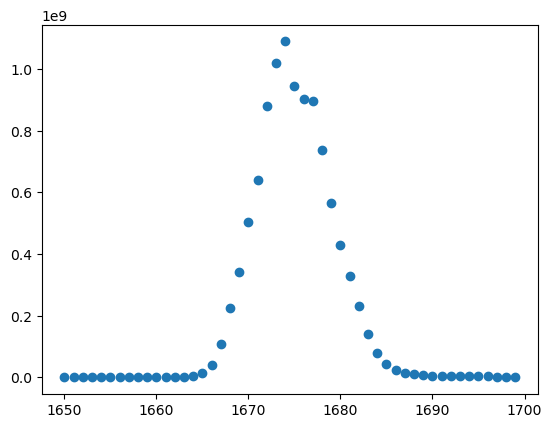

In [153]:
import matplotlib.pyplot as plt
plt.scatter(x = range(1650,1700), y = activation[17754, 1650:1700])